# Network analysis

We want to analyze the convolutional network presented in the lecture.

In [75]:
import numpy as np
import tensorflow.keras as k
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model

In [82]:
# Load and preprocess data
num_classes = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = k.utils.to_categorical(y_train, num_classes)
y_test = k.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [77]:
#Load model and print summary
model = k.models.load_model('../resources/keras_cifar10_trained_model.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

In [78]:
#Evaluate loaded model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 5s 527us/sample - loss: 770.8752 - accuracy: 0.4013

actual class [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
predicted class [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
actual class [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
predicted class [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
actual class [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
predicted class [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
actual class [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
predicted class [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
actual class [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
predicted class [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


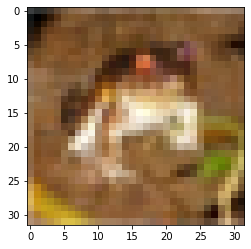

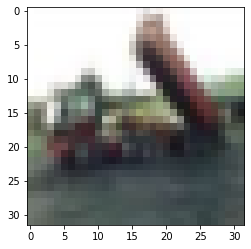

In [79]:
# compute prediction on the test set
y_predict = model.predict_classes(x_test)
y_predict = k.utils.to_categorical(y_predict, num_classes)

# Get indexes of wrong predictions
indexes_of_wrong_predictions = [index for index, prediction in enumerate(y_predict) if not(np.all(prediction == y_test[index]))]

# Plot some wrong predictions
for i in range(5):
    print('actual class', y_test[indexes_of_wrong_predictions[i]])
    print('predicted class', y_predict[i])
    fig = plt.figure()
    plt.imshow(x_train[indexes_of_wrong_predictions[i]],interpolation='nearest')

In [80]:
# Taking a sample image from the correctly predicted test set to visualize the activations
img = x_test[3]
plt.imshow(img,interpolation='nearest')
test_image = img[np.newaxis,:,:,:] #model.predict needs a 4D input

As we can see from the model summary, we have 4 convolutional layer. In the following we will visualize the activation in those convolutional layers to see if one can recognize some features in the activations.

Layer number 0; Layer name: conv2d_8; Number of filters: 32
Layer number 2; Layer name: conv2d_9; Number of filters: 32
Layer number 6; Layer name: conv2d_10; Number of filters: 64
Layer number 8; Layer name: conv2d_11; Number of filters: 64


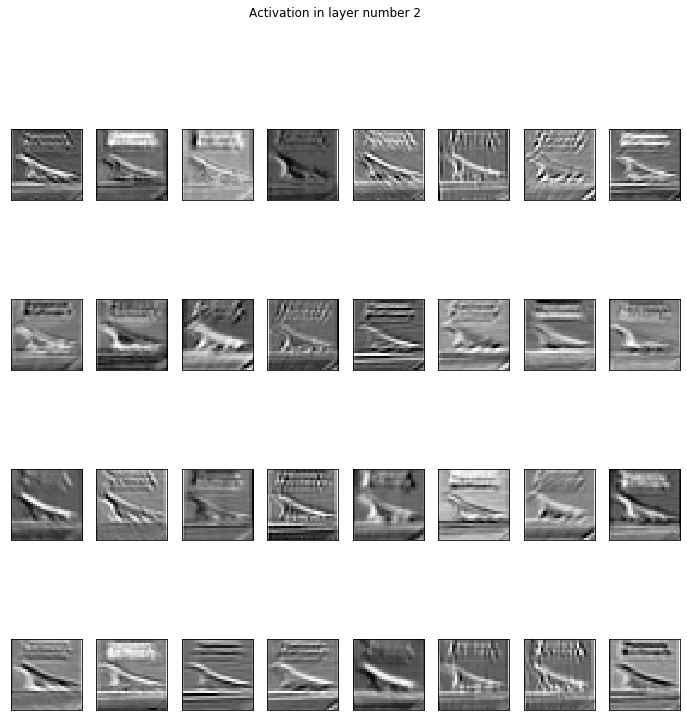

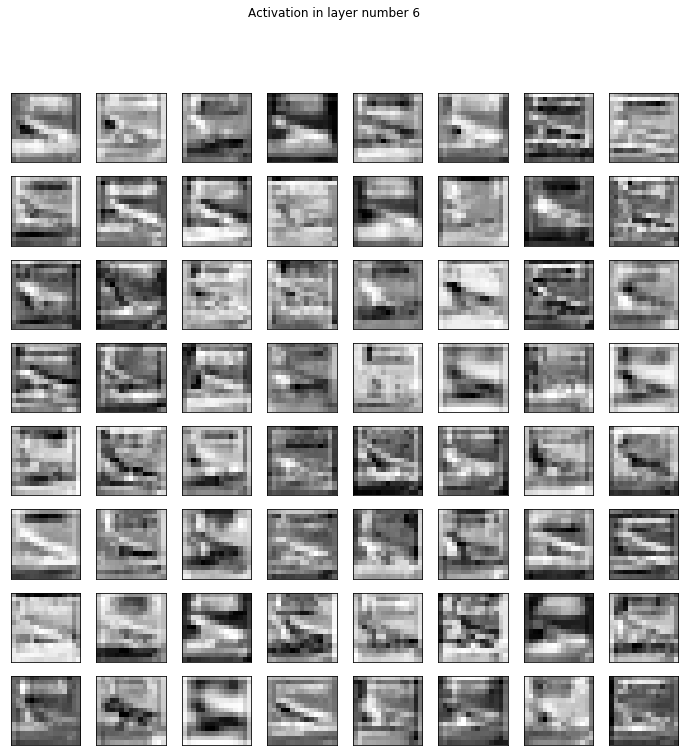

In [81]:
for num_of_layer in range(len(model.layers)):
    #filtering for the convolutional layers in the model
    layer = model.layers[num_of_layer]
    if 'conv' not in layer.name:
        continue

    num_of_filters = layer.output_shape[3]

    print('Layer number {num_of_layer}; Layer name: {name}; Number of filters: {num_of_filters}'.format(num_of_layer=num_of_layer, name=layer.name, num_of_filters=num_of_filters))

    #Build model to compute the output of the given layer
    model_to_see_activations = Model(inputs=model.inputs, outputs=model.layers[num_of_layer].output)
    #getting the activation map after using our example image as input
    activations = model_to_see_activations.predict(test_image)

    # Create a subplot for each filter in the convolutional network
    fig, axes = plt.subplots(int(num_of_filters/8), 8, figsize=(12,12))

    #plotting the activations for each layer
    for i in range(num_of_filters):
        axes[i// 8, i % 8].imshow(activations[0, :,:,i], interpolation='nearest',
                       cmap=plt.cm.Greys)
        axes[i// 8, i % 8].set_xticks(())
        axes[i// 8, i % 8].set_yticks(())
        plt.suptitle('Activation in layer number {num_of_layer}'.format(num_of_layer=num_of_layer))

    plt.show()

The first convolutional layer seems to recognize the outlines and the filters in the second convolutional layer seems to also activate for the structural outlines.
The third layer shows more coarse grained activation while the fourth layer does not show any obvious correlations.